# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time

# Import API key
from api_keys import api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []
countries = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    country = citipy.nearest_city(lat_lng[0], lat_lng[1]).country_code
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)
        countries.append(country.upper())

# Print the city count to confirm sufficient count
print(len(cities))

#Print the country count to confirm it matches city count
print(len(countries))

597
597


In [8]:
#Create a dataframe to store the data
cityWeather = pd.DataFrame({'City': cities, 'Cloudiness': "", 'Country': countries, 'Date': "",
                            'Humidity': "", 'Lat': "", 'Lng': "", 'Max Temp': "", 'Windspeed': ""})

#Preview the dataframe
cityWeather.head()

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Windspeed
0,arraial do cabo,,BR,,,,,,
1,barentsburg,,SJ,,,,,,
2,san juan,,US,,,,,,
3,bredasdorp,,ZA,,,,,,
4,mataura,,PF,,,,,,


### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [15]:
record_num = 1
record_set = 1

base_url = 'http://api.openweathermap.org/data/2.5/weather?units=imperial&q='

print('''
-----------------------------
Beginning Data Retrieval
-----------------------------''')
for index, row in cityWeather.iterrows(): 
    query_url = base_url + row['City'] + ',' + row['Country'] + '&APPID=' + api_key
    
    response = requests.get(query_url).json()
    
    try: 
        print(f'Processing Weather Data for Record {record_num} of Set {record_set} | {response["name"]}')
        
        cityWeather.loc[index, 'Cloudiness'] = response['clouds']['all']
        cityWeather.loc[index, 'Date'] = response['dt']
        cityWeather.loc[index, 'Humidity'] = response['main']['humidity']
        cityWeather.loc[index, 'Lat'] = response['coord']['lat']
        cityWeather.loc[index, 'Lng'] = response['coord']['lon']
        cityWeather.loc[index, 'Max Temp'] = response['main']['temp_max']
        cityWeather.loc[index, 'Windspeed'] = response['wind']['speed']
        
        record_num += 1
        
    except (KeyError, IndexError):
        print("City not found....Skipping............")
    
    #If statement to handle the API call limits
    if record_num == 51:
        record_set += 1
        record_num = 1
        time.sleep(60)
        
print('''
-----------------------------
Data Retrival Complete
-----------------------------''')


-----------------------------
Beginning Data Retrieval
-----------------------------
Processing Weather Data for Record 1 of Set 1 | Arraial do Cabo
Processing Weather Data for Record 2 of Set 1 | San Juan
Processing Weather Data for Record 3 of Set 1 | Bredasdorp
Processing Weather Data for Record 4 of Set 1 | Hobart
Processing Weather Data for Record 5 of Set 1 | Hasaki
Processing Weather Data for Record 6 of Set 1 | Vyborg
Processing Weather Data for Record 7 of Set 1 | Longyearbyen
Processing Weather Data for Record 8 of Set 1 | Malindi
Processing Weather Data for Record 9 of Set 1 | Ushuaia
Processing Weather Data for Record 10 of Set 1 | Jamestown
Processing Weather Data for Record 11 of Set 1 | Tasiilaq
Processing Weather Data for Record 12 of Set 1 | Butaritari
Processing Weather Data for Record 13 of Set 1 | Khatanga
Processing Weather Data for Record 14 of Set 1 | Hilo
Processing Weather Data for Record 15 of Set 1 | Yellowknife
Processing Weather Data for Record 16 of Set 1

Processing Weather Data for Record 41 of Set 3 | West Wendover
Processing Weather Data for Record 42 of Set 3 | Coos Bay
Processing Weather Data for Record 43 of Set 3 | Hofn
Processing Weather Data for Record 44 of Set 3 | Nanortalik
Processing Weather Data for Record 45 of Set 3 | Kununurra
Processing Weather Data for Record 46 of Set 3 | Brzesko
Processing Weather Data for Record 47 of Set 3 | Minyar
Processing Weather Data for Record 48 of Set 3 | Safita
Processing Weather Data for Record 49 of Set 3 | Thouars
Processing Weather Data for Record 50 of Set 3 | Olot
Processing Weather Data for Record 1 of Set 4 | Xuanzhou
Processing Weather Data for Record 2 of Set 4 | Dodola
Processing Weather Data for Record 3 of Set 4 | Brae
Processing Weather Data for Record 4 of Set 4 | Biak
Processing Weather Data for Record 5 of Set 4 | Kavieng
Processing Weather Data for Record 6 of Set 4 | Thompson
Processing Weather Data for Record 7 of Set 4 | Flinders
Processing Weather Data for Record 8 o

Processing Weather Data for Record 31 of Set 6 | Rio Cuarto
Processing Weather Data for Record 32 of Set 6 | Isangel
Processing Weather Data for Record 33 of Set 6 | Develi
Processing Weather Data for Record 34 of Set 6 | Tromso
Processing Weather Data for Record 35 of Set 6 | Udaipura
Processing Weather Data for Record 36 of Set 6 | Basco
Processing Weather Data for Record 37 of Set 6 | Caravelas
Processing Weather Data for Record 38 of Set 6 | Altusried
Processing Weather Data for Record 39 of Set 6 | Aran
Processing Weather Data for Record 40 of Set 6 | Kruisfontein
Processing Weather Data for Record 41 of Set 6 | Las Vegas
Processing Weather Data for Record 42 of Set 6 | Parabel
Processing Weather Data for Record 43 of Set 6 | Zhigansk
Processing Weather Data for Record 44 of Set 6 | La Palma
Processing Weather Data for Record 45 of Set 6 | Caohai
Processing Weather Data for Record 46 of Set 6 | Bonavista
Processing Weather Data for Record 47 of Set 6 | Beringovskiy
Processing Weat

Processing Weather Data for Record 23 of Set 9 | Najran
Processing Weather Data for Record 24 of Set 9 | Hukuntsi
Processing Weather Data for Record 25 of Set 9 | Todos Santos
Processing Weather Data for Record 26 of Set 9 | Banda Aceh
Processing Weather Data for Record 27 of Set 9 | Jalu
Processing Weather Data for Record 28 of Set 9 | Shingu
Processing Weather Data for Record 29 of Set 9 | Uppsala
Processing Weather Data for Record 30 of Set 9 | Puerto Padre
Processing Weather Data for Record 31 of Set 9 | Vao
Processing Weather Data for Record 32 of Set 9 | Daura
Processing Weather Data for Record 33 of Set 9 | Bugama
Processing Weather Data for Record 34 of Set 9 | Forbes
Processing Weather Data for Record 35 of Set 9 | Saint-Joseph
Processing Weather Data for Record 36 of Set 9 | Suleja
Processing Weather Data for Record 37 of Set 9 | Bako
Processing Weather Data for Record 38 of Set 9 | Coihaique
Processing Weather Data for Record 39 of Set 9 | Russellville
Processing Weather Dat

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [16]:
# Convert array of JSONs into Pandas DataFrame
cityWeather['Max Temp'] = cityWeather['Max Temp'].replace('', np.nan)
cityWeather = cityWeather.dropna()

#Save dataframe
cityWeather.to_csv("Output/CityWeatherData.csv", index=False, header=True)

#Preview the dataframe
cityWeather.head()

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Windspeed
0,arraial do cabo,100,BR,1569735530,85,-22.97,-42.02,67.30,10.98
2,san juan,40,US,1569735531,83,26.19,-98.16,84.20,10.29
3,bredasdorp,100,ZA,1569735531,96,-34.53,20.04,57.99,7
5,hobart,75,AU,1569735531,50,-42.88,147.33,55.40,14.99
7,hasaki,75,JP,1569735531,83,35.73,140.83,86.00,10.29


### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

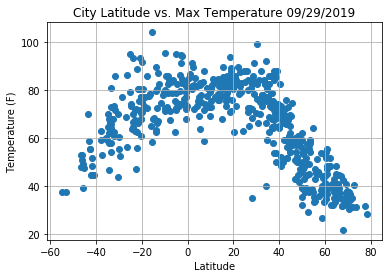

In [17]:
plt.scatter(cityWeather["Lat"], cityWeather["Max Temp"], marker="o")

plt.title(f'City Latitude vs. Max Temperature {time.strftime("%m/%d/%Y")}')
plt.ylabel("Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

plt.savefig("Output/City Latitude vs. Max Temperature.png")

plt.show()

#### Latitude vs. Humidity Plot

#### Latitude vs. Cloudiness Plot

#### Latitude vs. Wind Speed Plot